In [1]:
from backSpider import *
import pandas as pd
import numpy as np
import matplotlib
# matplotlib.use('tkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from matplotlib.font_manager import FontProperties
mysql = MsSql(db='liurui')
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)

In [2]:
def get_data(values,cols):
    sql = f"select d,avg(v) from yj_laman where d>400 and d<3300 and class like '%{values}%' group by d order by d"
    data = mysql.ExecQuery(sql)
    col = cols.split(',')
    df = pd.DataFrame(data, columns=col)
    df = df.set_index('d')
    return df

In [3]:
cols = "6,132,12,42".split(',')
for i,v in enumerate(cols):
    if (i==0):
        df = get_data(v,'d,v'+v)
    else:
        tdf = get_data(v,'d,v'+v)
        df = pd.concat([df,tdf],axis=1)
df.columns = ['BD6','DF132','LD12','KD42']
df

,BD6,DF132,LD12,KD42
d,,,,
401,6490,7125,6351,7140
402,6523,7160,6384,7178
403,6557,7195,6417,7215
404,6591,7231,6449,7250
405,6622,7266,6479,7283
...,...,...,...,...
3295,4553,4136,5201,4535
3296,4542,4127,5195,4527
3297,4530,4118,5188,4520


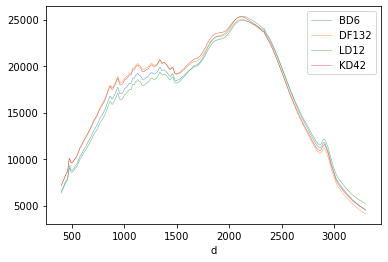

In [4]:
df.to_csv("./yj_avg4.csv")
ax = df.plot(alpha=0.75,linewidth=0.5)
plt.savefig(f"./yj_avg4.png",dpi=1000,format='png')
plt.show()

[ 477  577  862  937 1050 1083 1125 1262 1338 1378 1457 1659 1844 2104
 2330 2910]
[ 109.0735509   -33.79714819  275.08316419  382.83433787 -105.44228482
  236.94298923   69.99797367  111.32658817  144.34646152  425.48802068
  -61.79091633 -216.32388857  -11.69586483  174.31851899   84.64511406
  334.69183062]
[ 477  616  715  861  936 1051 1125 1260 1337 1380 1457 1658 1846 2089
 2330 2909]
[  76.49171318   -1.94938548   20.70462611  279.39490936  383.28696813
 -124.52176478   75.70568868  125.10718171  128.35824149  408.5189301
  -70.13521696 -203.43203555   -4.846385    208.99737651   71.40445811
  276.89259727]
[ 477  613  862  937 1049 1125 1261 1339 1378 1458 1658 1843 2114 2330
 2911]
[  90.40956466  -17.8650774   285.17982796  388.52197911  -99.22349302
   66.30526795   97.8173858   148.91555717  424.47281995  -60.23728626
 -206.72746206    3.99744746  202.93390937   53.41554739  360.81373079]
[ 477  579  713  864  936 1049 1125 1260 1338 1379 1457 1660 1837 2114
 2330 2909]
[ 

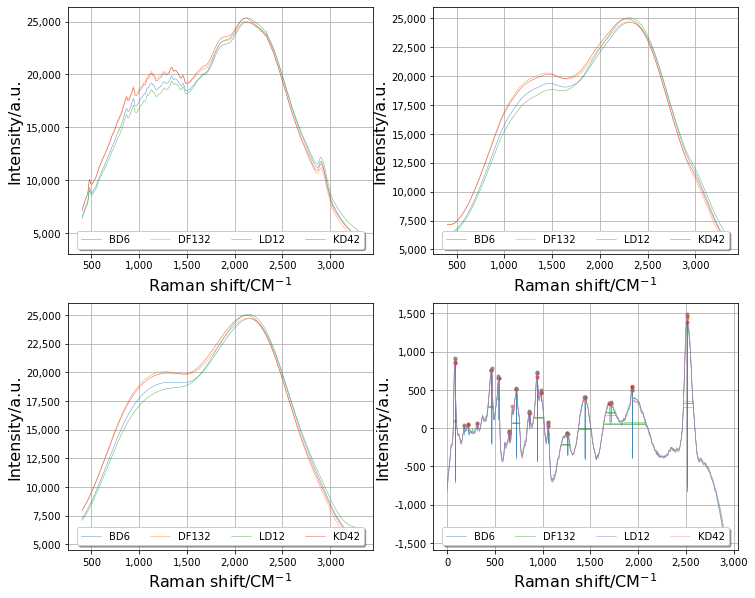

In [5]:
# %matplotlib auto
from scipy import signal
from scipy.signal import find_peaks,peak_prominences,chirp,peak_widths,find_peaks_cwt
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12)
t = np.array(df.index)
cols = ['BD6','DF132','LD12','KD42']
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,10))
for col in cols: 
    x = np.array(df[col])
    b,a = signal.butter(2,0.003)
    zi = signal.lfilter_zi(b,a)
    z,_=signal.lfilter(b,a,x,zi=zi*x[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, x)
    X = x-y
    ax1.plot(t, x, alpha=0.75,linewidth=0.5,label=col)
    ax2.plot(t, z, alpha=0.75,linewidth=0.5,label=col)
    ax3.plot(t, y, alpha=0.75,linewidth=0.5,label=col)
    peaks,peaks_dic = find_peaks(X,width=10,prominence=75,rel_height=0.5)
    ax4.plot(x-y, alpha=0.75,linewidth=0.5,label=col)
    ax4.plot(peaks, X[peaks], ".", alpha=0.75,linewidth=0.5)
    ax4.vlines(x=peaks,ymin=X[peaks]-peaks_dic["prominences"],ymax=X[peaks], alpha=0.75,linewidth=0.5)
    ax4.hlines(y=peaks_dic["width_heights"],xmin=peaks_dic["left_ips"],xmax=peaks_dic["right_ips"], color="C2", alpha=0.75,linewidth=0.5)
    print(peaks+400)
    print(peaks_dic["width_heights"])
leg = ax1.legend(loc="lower center", ncol=4, shadow=True, fancybox=True)
leg = ax2.legend(loc="lower center", ncol=4, shadow=True, fancybox=True)
leg = ax3.legend(loc="lower center", ncol=4, shadow=True, fancybox=True)
leg = ax4.legend(loc="lower center", ncol=4, shadow=True, fancybox=True)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax4.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax4.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_ylabel(r'Intensity/a.u.',fontsize=16)
ax1.set_xlabel(r'Raman shift/$\mathrm{CM}^{-1}$',fontsize=16)
ax2.set_ylabel(r'Intensity/a.u.',fontsize=16)
ax2.set_xlabel(r'Raman shift/$\mathrm{CM}^{-1}$',fontsize=16)
ax3.set_ylabel(r'Intensity/a.u.',fontsize=16)
ax3.set_xlabel(r'Raman shift/$\mathrm{CM}^{-1}$',fontsize=16)
ax4.set_ylabel(r'Intensity/a.u.',fontsize=16)
ax4.set_xlabel(r'Raman shift/$\mathrm{CM}^{-1}$',fontsize=16)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
# plt.savefig(f"./yj6_滤波效果图_2.png",dpi=1000,format='png')
plt.show()